In [2]:
import data_analysis_tool as dat
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1234)

x = np.linspace(1., 5., 81)
arr1 = (np.dstack((x, x**2+np.random.normal(size=81))))[0]
arr2 = (np.dstack((x, 2.*np.cos(np.pi*x/3.)+np.random.normal(scale=0.2, size=81))))[0]
arr3 = (np.dstack((x, 2.*np.cos(np.pi*x/3.)+np.random.normal(scale=0.2, size=81))))[0]
arr4 = (np.dstack((x, 2.*np.cos(np.pi*x/3.)+np.random.normal(scale=0.2, size=81))))[0]

x1, x2 = np.linspace(-3., 3., 61), np.linspace(-0.5, 0.5, 101)
arr5 = (np.dstack((x1, 5*np.exp(-10.*x1**2)*np.random.normal(1., 0.001, size=61))))[0]
arr6 = (np.dstack((x2, 5*np.exp(-10.*x2**2)*np.random.normal(1., 1E-5, size=101))))[0]

x = np.linspace(10., 30., 201)+2.*np.random.rand(201)-1.
arr7 = (np.dstack((x, np.exp(-x/10.)+np.random.normal(scale=0.003, size=201))))[0]

x = np.exp(3.*np.linspace(0., 1., 1001))
arr8 = (np.dstack((x, np.sin(0.5*np.pi*x)+np.random.normal(scale=0.2, size=1001))))[0]

x = np.linspace(5., 10., 51)
arr9 = (np.dstack((x, (x-6.)*(x-9.)+np.random.normal(scale=0.1, size=51))))[0]
x = np.linspace(-5., 5., 201)
arr10 = (np.dstack((x, 1./(1.+np.exp(x))+np.random.normal(scale=0.005, size=201))))[0]

x = np.arange(7)+0.2
arr11 = (np.dstack((x, 3.6*x+np.random.normal(size=7))))[0]

### Making a Data Object

In [4]:
arr = np.array([
    [1., 1.04E-6],
    [2., 0.48E-6],
    [3., 0.32E-6],
    [4., 0.27E-6],
    [5., 0.20E-6]
])

data = dat.Data(xval=[1.,2.,3.,4.,5.], yval=[1.04,0.48,0.32,0.27,0.20], xerr=0.01, yerr=[0.05,0.05,0.05,0.05,0.05], scale=[1., 1E-6])
print(data)

[[1.0+/-0.01 1.04e-06+/-5e-08]
 [2.0+/-0.01 4.8e-07+/-5e-08]
 [3.0+/-0.01 3.2e-07+/-5e-08]
 [4.0+/-0.01 2.7e-07+/-5e-08]
 [5.0+/-0.01 2e-07+/-5e-08]]


In [5]:
data0 = dat.makeData(arr, xerr=0.01, yerr=5E-8)
print(data0)

[[1.0+/-0.01 1.04e-06+/-5e-08]
 [2.0+/-0.01 4.8e-07+/-5e-08]
 [3.0+/-0.01 3.2e-07+/-5e-08]
 [4.0+/-0.01 2.7e-07+/-5e-08]
 [5.0+/-0.01 2e-07+/-5e-08]]


In [6]:
print(data[2])

[3.0+/-0.01 3.2e-07+/-5e-08]


In [7]:
print(dat.array(data))
print(type(dat.array(data)))

[[1.00e+00 1.04e-06 1.00e-02 5.00e-08]
 [2.00e+00 4.80e-07 1.00e-02 5.00e-08]
 [3.00e+00 3.20e-07 1.00e-02 5.00e-08]
 [4.00e+00 2.70e-07 1.00e-02 5.00e-08]
 [5.00e+00 2.00e-07 1.00e-02 5.00e-08]]
<class 'numpy.ndarray'>


### Introduction to Uncertainties

In [8]:
import uncertainties as u
import uncertainties.unumpy as unp
# https://pythonhosted.org/uncertainties/

In [9]:
x = u.ufloat(nominal_value=5., std_dev=0.4)
print(x)

5.0+/-0.4


In [10]:
print(x**2+1./x+5.)

y = u.ufloat(4., 0.2)
print(x-y)

z = 2.*x
print(z-2.*x)

30+/-4
1.0+/-0.4
0.0+/-0


### Elementary Arithmetic

In [11]:
print(data+0.2)

[[1.0+/-0.01 0.20000104000000002+/-5e-08]
 [2.0+/-0.01 0.20000048+/-5e-08]
 [3.0+/-0.01 0.20000032+/-5e-08]
 [4.0+/-0.01 0.20000027+/-5e-08]
 [5.0+/-0.01 0.20000020000000002+/-5e-08]]


In [12]:
print(x*data)

[[1.0+/-0.01 5.2e-06+/-4.853411171536985e-07]
 [2.0+/-0.01 2.4e-06+/-3.152205577052359e-07]
 [3.0+/-0.01 1.6e-06+/-2.808629559055448e-07]
 [4.0+/-0.01 1.35e-06+/-2.7233068134163654e-07]
 [5.0+/-0.01 1e-06+/-2.624880949681337e-07]]


In [13]:
print(data**0.5)

[[1.0+/-0.01 0.001019803902718557+/-2.4514516892273005e-05]
 [2.0+/-0.01 0.0006928203230275509+/-3.6084391824351606e-05]
 [3.0+/-0.01 0.000565685424949238+/-4.419417382415922e-05]
 [4.0+/-0.01 0.0005196152422706632+/-4.811252243246881e-05]
 [5.0+/-0.01 0.00044721359549995795+/-5.5901699437494744e-05]]


### Plotting Graphs

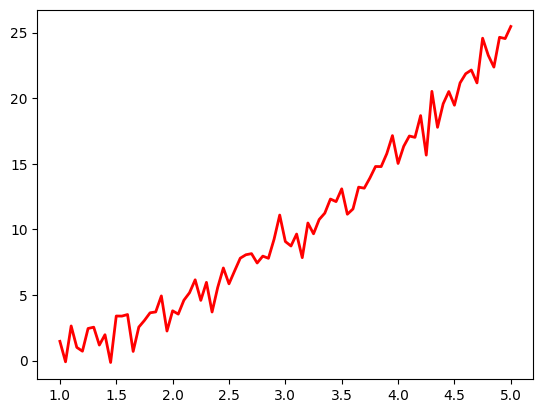

In [14]:
data1 = dat.makeData(arr1)
data1.seterr(0.02, 0.8)
dat.plot(data1, c='r', lw=2.)

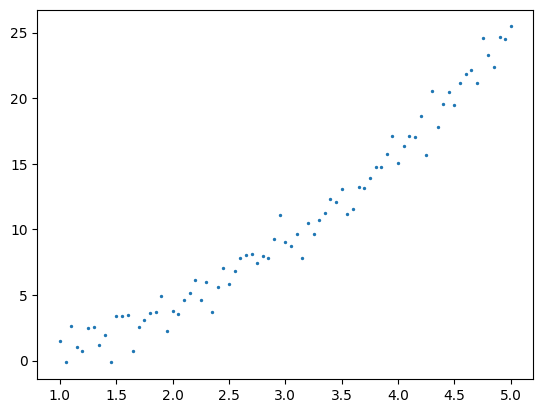

In [15]:
dat.scatter(data1, s=2.)

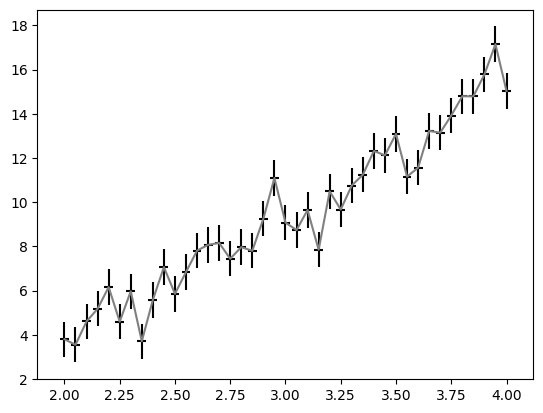

In [16]:
dat.errorbar(data1, [2., 4.], c='gray', ecolor='k')

### Basic Manipulations

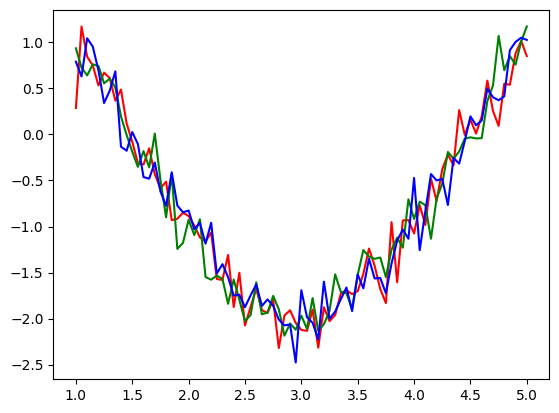

In [17]:
data2 = dat.makeData(arr2, xerr=0.02, yerr=0.04)
data3 = dat.makeData(arr3, xerr=0.02, yerr=0.04)
data4 = dat.makeData(arr4, xerr=0.02, yerr=0.04)

data2.plot(c='r')
data3.plot(c='g')
data4.plot(c='b')

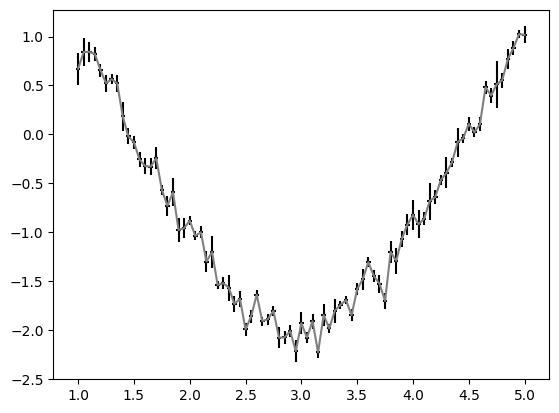

In [18]:
data_merged = dat.merge(data2, data3, data4)
data_merged.sort()
data_merged.errorbar(c='gray', ecolor='k')

In [19]:
print(data_merged.amin())
print(data_merged.argmin())

[3.15+/-0.02 -2.2260501559364307+/-0.0587144670606902]
43


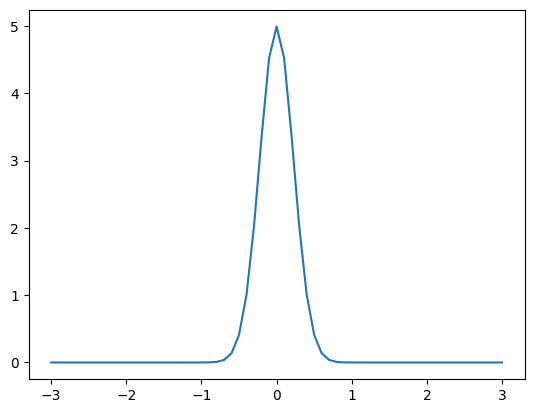

In [20]:
data5 = dat.makeData(arr5, xerr=0.05, yerr=0.001)
data5.plot()

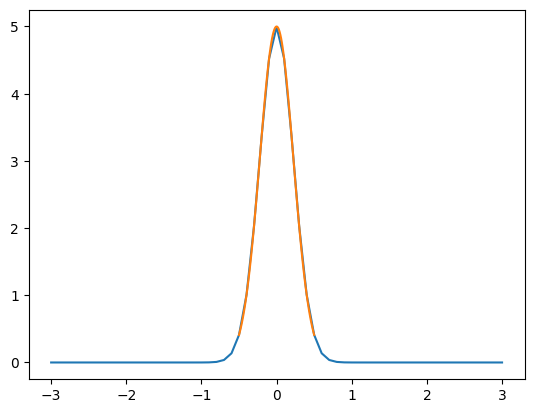

In [21]:
data6 = dat.makeData(arr6, xerr=0.01, yerr=0.001)
data5.plot()
data6.plot()

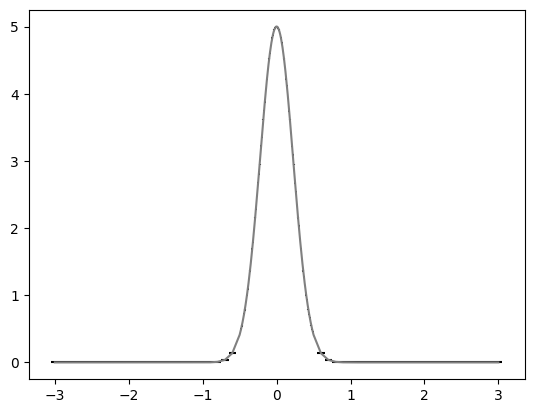

In [22]:
data_combined = dat.overwrite(data6, data5)
data_combined.errorbar(c='gray', ecolor='k')

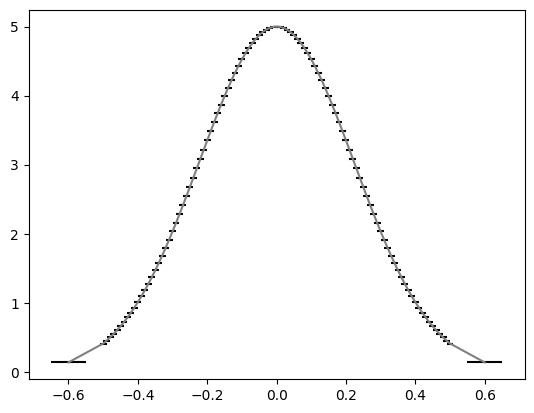

In [23]:
data_snipped = dat.snip(data_combined, [-1., 1.], [0.1, 6.])
data_snipped.errorbar(c='gray', ecolor='k')

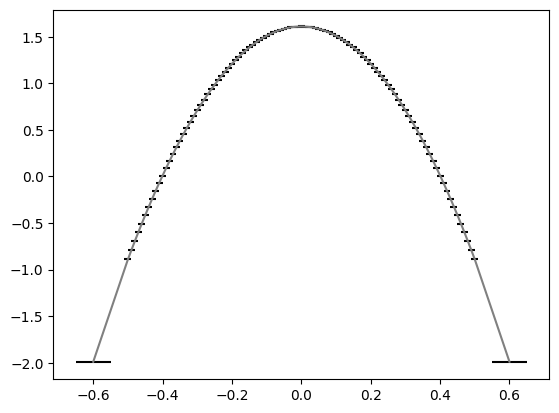

In [24]:
yfunc = lambda y: unp.log(y)

data_applied = dat.apply(data_snipped, yfunc=yfunc)
data_applied.errorbar(c='gray', ecolor='k')

### Smoothing Data

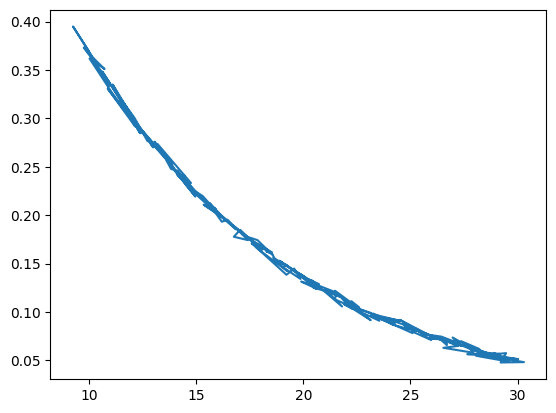

In [24]:
data7 = dat.makeData(arr7, xerr=0.01, yerr=0.01)
data7.plot()

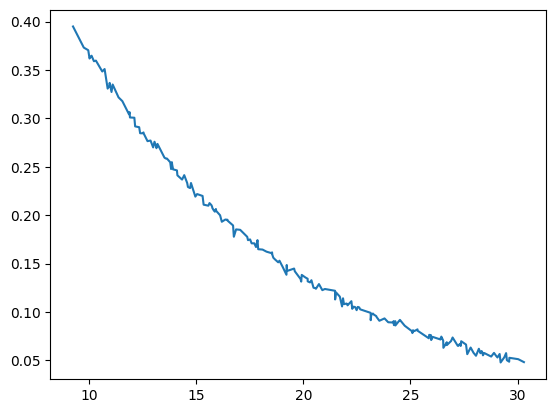

In [25]:
data7.sort()
data7.plot()

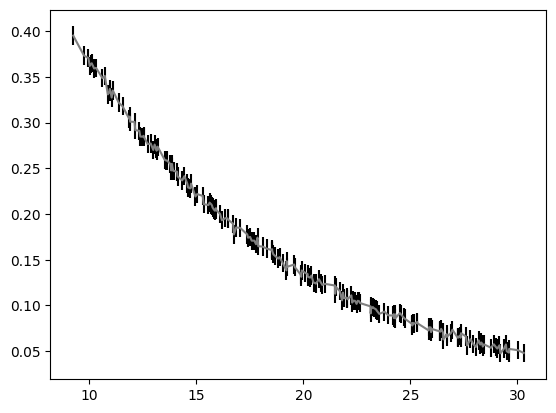

In [26]:
data7.errorbar(c='gray', ecolor='k')

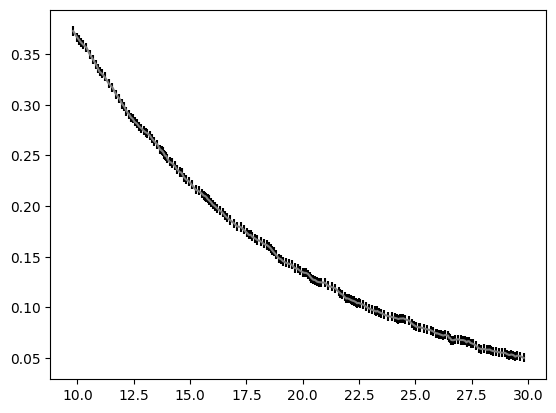

In [27]:
data_avemov = dat.smooth(data7)
data_avemov.errorbar(c='gray', ecolor='k')

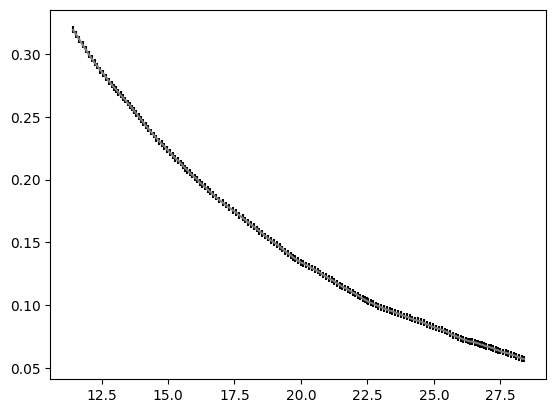

In [28]:
data_savgol = dat.savgol(data7, 31, 2)  # https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter
data_savgol.errorbar(c='gray', ecolor='k')

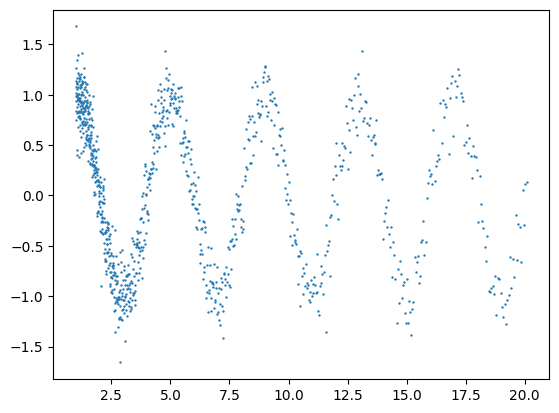

In [29]:
data8 = dat.makeData(arr8, xerr=1E-5, yerr=0.05)
data8.scatter(s=0.5)

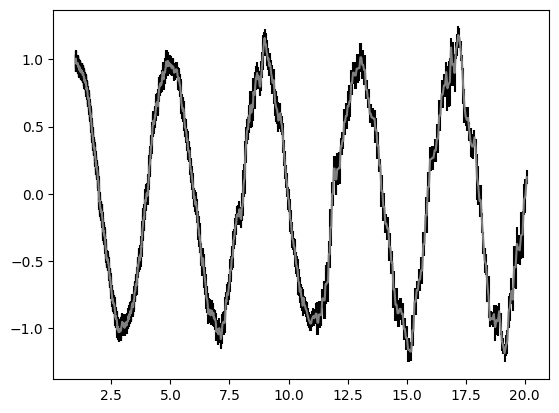

In [30]:
data_nbr_avemov = dat.nbrsmooth(data8, 0.1)
data_nbr_avemov.errorbar(c='gray', ecolor='k')

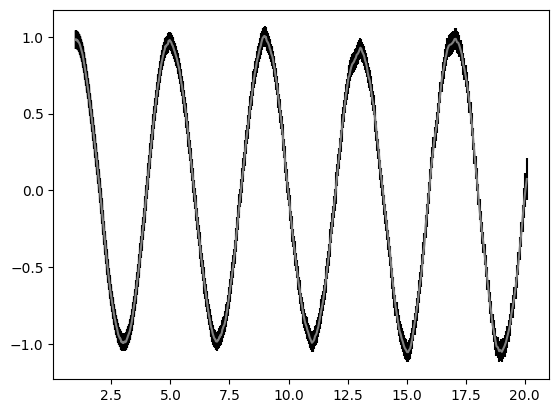

In [31]:
data_nbr_poly = dat.polysmooth(data8, 1., 2)
data_nbr_poly.errorbar(c='gray', ecolor='k')

### Differentiation

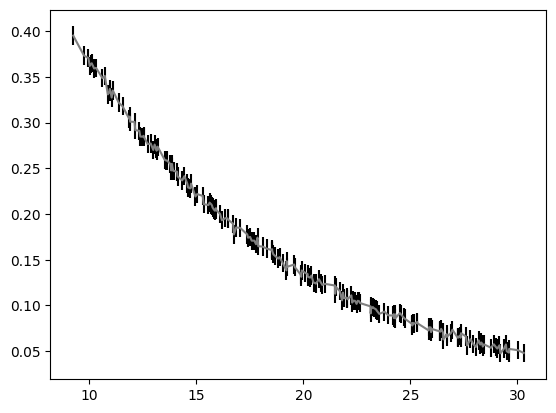

In [32]:
data7.errorbar(c='gray', ecolor='k')

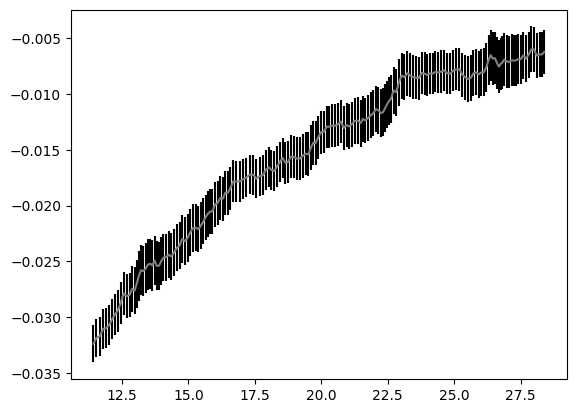

In [33]:
data_savgolD = dat.savgol(data7, 31, 2, 1)
data_savgolD.errorbar(c='gray', ecolor='k')

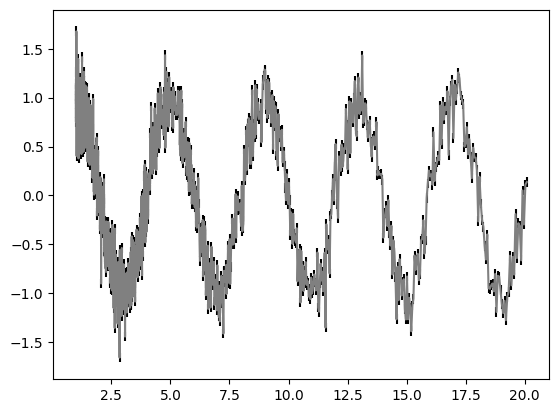

In [34]:
data8.errorbar(c='gray', ecolor='k')

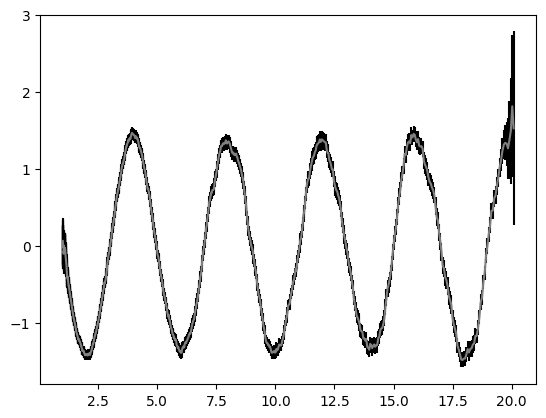

In [35]:
data_polyD = dat.polysmooth(data8, 0.7, 2, 1)
data_polyD.errorbar(c='gray', ecolor='k')

### Interpolation

<ErrorbarContainer object of 3 artists>

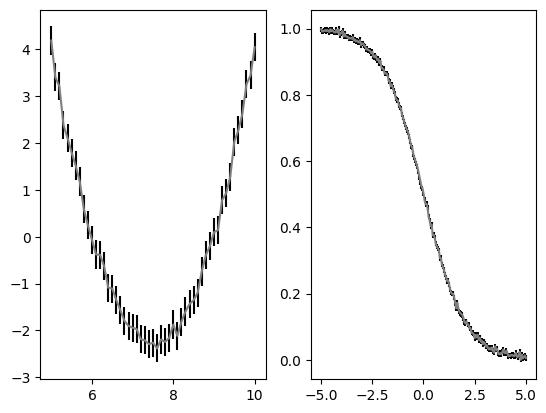

In [36]:
data9 = dat.makeData(arr9, xerr=0.02, yerr=0.3)
data10 = dat.makeData(arr10, xerr=0.005, yerr=0.008)

fig, (ax1, ax2) = plt.subplots(1, 2)
dat.errorbar(data9, graph=ax1, c='gray', ecolor='k')
dat.errorbar(data10, graph=ax2, c='gray', ecolor='k')

In [37]:
print(data10(-2.63))

0.933+/-0.006


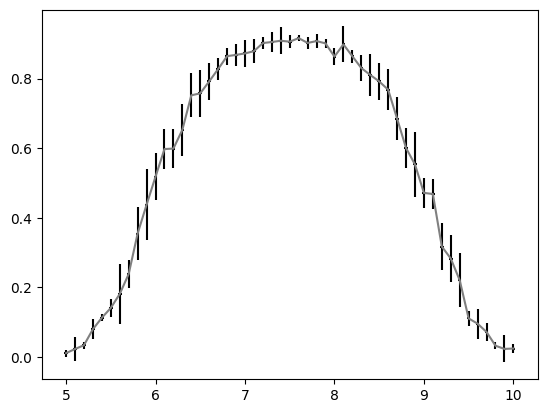

In [38]:
data_interp = dat.xyzinterp(data9, data10, 4, 2)
data_interp.errorbar(c='gray', ecolor='k')

### Fitting

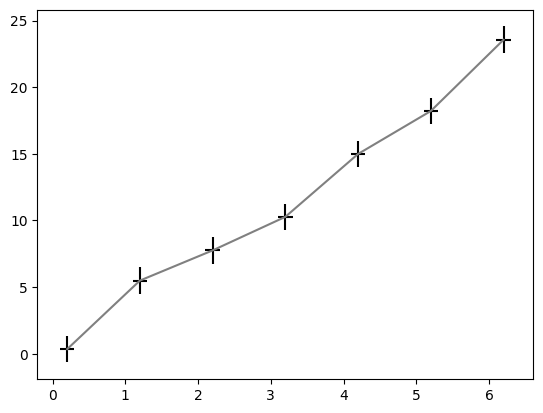

In [39]:
data11 = dat.makeData(arr11, xerr=0.1, yerr=1.)
data11.errorbar(c='gray', ecolor='k')

In [40]:
linearfit = dat.linereg(data11)
linearfit.show()

####################

Function: linear regression

Parameters:
m: 3.66+/-0.20
b: -0.2+/-0.8

Statistics:
chi-squared/dof: 0.8497071082676113
R-squared value: 0.987289337942816

####################


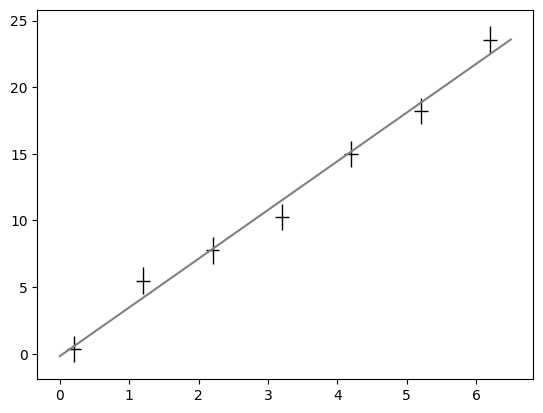

In [41]:
data11.errorbar(lw=0., elinewidth=1., c='k')
dat.directplot(linearfit, [0., 6.5], c='gray')

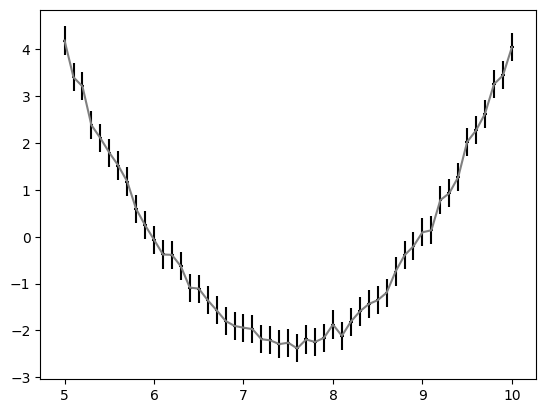

In [42]:
data9.errorbar(c='gray', ecolor='k')

In [43]:
polyfit = dat.polyfit(data9, 2)
polyfit.show()

####################

Function: polynomial of order 2

Parameters:
c2: 1.013+/-0.009
c1: -15.20+/-0.13
c0: 54.7+/-0.5

Statistics:
chi-squared/dof: 0.1457488201333121

####################


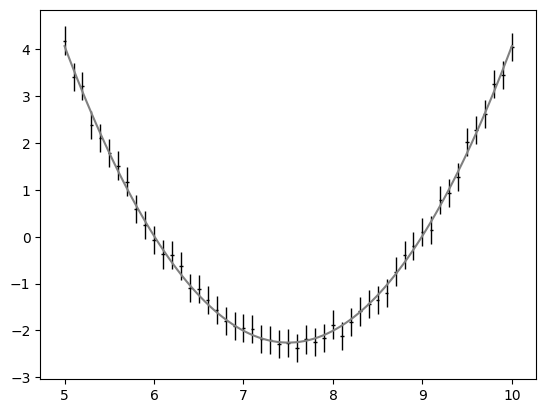

In [44]:
data9.errorbar(lw=0., elinewidth=1., c='k')
dat.directplot(polyfit, [5., 10.], c='gray')

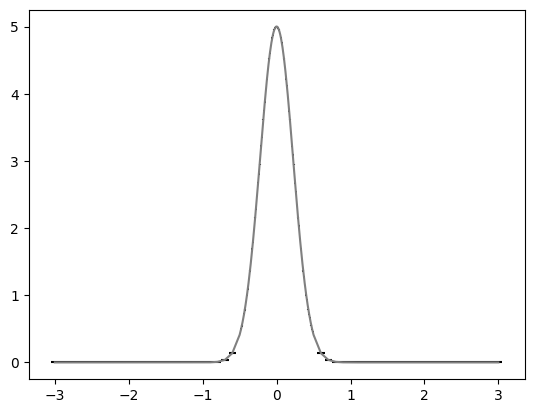

In [45]:
data_combined.errorbar(c='gray', ecolor='k')

In [46]:
def func_to_fit(x, A, B):
    return A*np.exp(-B*x**2)

funcfit = dat.fitting(data_combined, func_to_fit, A=5., B=5.)
funcfit.show()

####################

Function: func_to_fit

Parameters:
A: 5.0001+/-0.0010
B: 10.00+/-0.07

Statistics:
chi-squared/dof: 0.001870137433493121

####################


### Reading Data

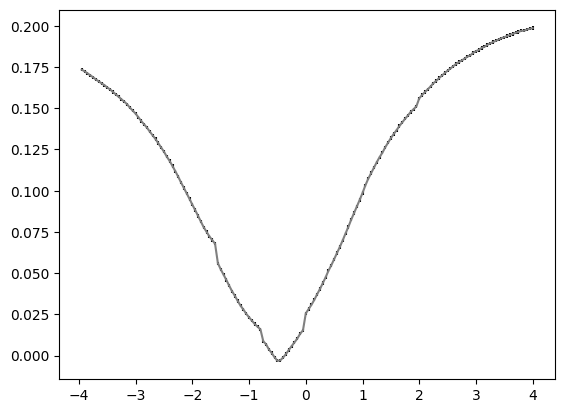

In [47]:
data_txt = dat.read('data.txt')
data_txt.seterr(1E-4, 0.001)
data_txt.errorbar(c='gray', ecolor='k')

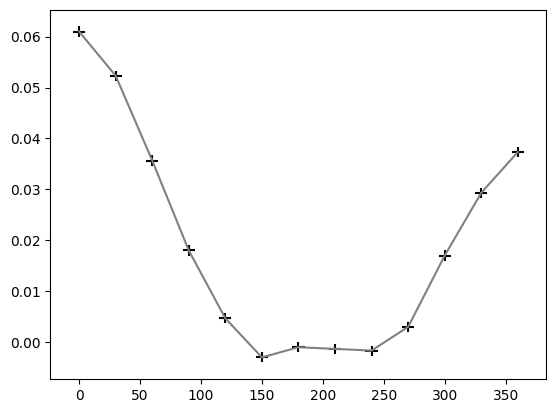

In [48]:
data_xlsx = dat.read('data.xlsx', scale=[1., 0.001], sheet_name='Sheet1', cells=['B3:B15', 'D3:D15'])
data_xlsx.seterr(5., 0.001)
data_xlsx.errorbar(c='gray', ecolor='k')

### Saving Data

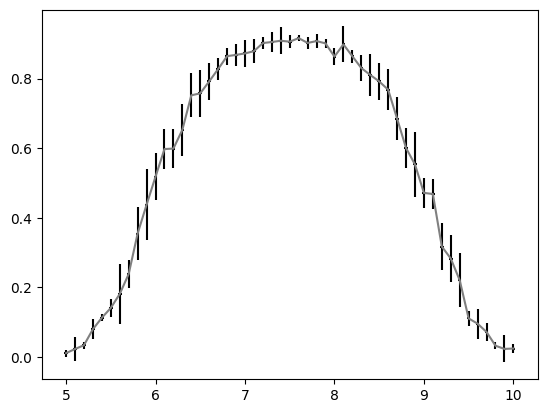

In [49]:
data_interp.errorbar(c='gray', ecolor='k')

In [50]:
dat.savetxt(data_interp, 'interpolation.txt')

In [51]:
dat.savexlsx(data_interp, 'interpolation.xlsx', 'sheet', 'C3')

In [52]:
linearfit.save('fit_result.txt')

### Thank you for your attention!